Found 640 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/20
20/20 [==============================] - 30s 1s/step - loss: 1.3105 - accuracy: 0.5813 - val_loss: 0.8634 - val_accuracy: 0.4437
Epoch 2/20
20/20 [==============================] - 27s 1s/step - loss: 0.3052 - accuracy: 0.8938 - val_loss: 0.1995 - val_accuracy: 0.9500
Epoch 3/20
20/20 [==============================] - 27s 1s/step - loss: 0.1026 - accuracy: 0.9672 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 4/20
20/20 [==============================] - 27s 1s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 28s 1s/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 29s 1s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/20
20/20 [===================

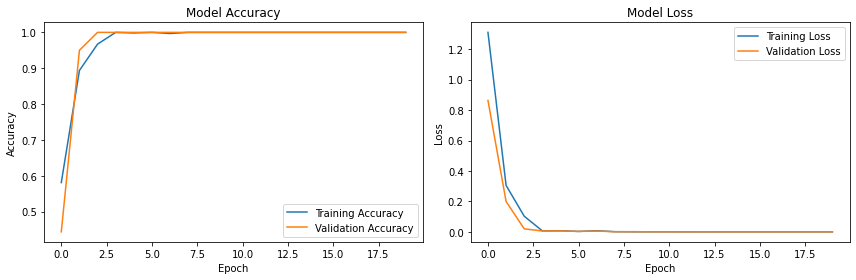

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 20

# Define paths
BASE_DIR = 'D:\Currency detection\dataset'  # Change this to your dataset path
TRAIN_DIR = os.path.join('D:\Currency detection\dataset', 'train')
TEST_DIR = os.path.join('D:\Currency detection\dataset', 'test')

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Create the model
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes for 10, 100, 20, 2000 rupee notes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Save the model
model.save('currency_detection_model.h5')



25/25 [==============================] - 9s 360ms/step - loss: 2.0017e-05 - accuracy: 1.0000

Test accuracy: 1.0000


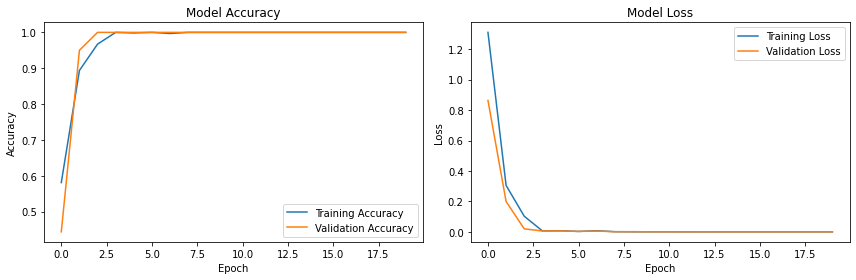

In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Plot training results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
